In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from math import radians
import matplotlib.image as mpimg


colors= ['#1c76b6', '#a7dae9', '#eb6a20', '#f59d3d', '#677fa0', '#d6e4ed', '#f7e9e5']
sns.set_palette(colors)

In [2]:
df = pd.read_csv('housing_data.csv', encoding='gbk', low_memory=False)
df.shape

(318851, 22)

In [3]:
df.head()

Unnamed: 0                                                url  \
0           0  https://bj.lianjia.com/chengjiao/101084782030....   
1           1  https://bj.lianjia.com/chengjiao/101086012217....   
2           2  https://bj.lianjia.com/chengjiao/101086041636....   
3           3  https://bj.lianjia.com/chengjiao/101086406841....   
4           4  https://bj.lianjia.com/chengjiao/101086920653....   

             id         Lng        Lat            Cid   tradeTime     DOM  \
0  101084782030  116.475489  40.019520  1111027376244  2016-08-09  1464.0   
1  101086012217  116.453917  39.881534  1111027381879  2016-07-28   903.0   
2  101086041636  116.561978  39.877145  1111040862969  2016-12-11  1271.0   
3  101086406841  116.438010  40.076114  1111043185817  2016-09-30   965.0   
4  101086920653  116.428392  39.886229  1111027381174  2016-08-28   927.0   

   totalPrice  square  ... kitchen bathRoom  floor constructionTime  \
0       415.0  131.00  ...       1        1   高 26             2005   
1       575.0  132.38  ...       1        2   高 22             2004   
2      1030.0  198.00  ...       1        3    中 4             2005   
3       297.5  134.00  ...       1        1   底 21             2008   
4       392.0   81.00  ...       1        1    中 6             1960   

  renovationCondition buildingStructure  ladderRatio  elevator  subway  \
0                   3                 6        0.217       1.0     1.0   
1                   4                 6        0.667       1.0     0.0   
2                   3                 6        0.500       1.0     0.0   
3                   1                 6        0.273       1.0     0.0   
4                   2                 2        0.333       0.0     1.0   

   district  
0         7  
1         7  
2         7  
3         6  
4         1  

[5 rows x 22 columns]

<center>
<table>
<tr>
<td><code>Unnamed: 0</code></td><td>This is a data index that we do not need and should be removed.</td>
</tr>

<tr>
<td><code>url</code></td><td>Trade link</td>
</tr>

<tr>
<td><code>id</code></td><td>Trade ID</td>
</tr>

<tr>
<td><code>Lng</code></td><td>Longitude of the traded house</td>
</tr>

<tr>
<td><code>Lat</code></td><td>Latitude of the traded house Done</td>
</tr>

<tr>
<td><code>Cid</code></td><td>Buyer ID</td>
</tr>

<tr>
<td><code>tradeTime</code></td><td>Time of transaction</td>
</tr>

<tr>
<td><code>DOM</code></td><td>Number of days since the listing was posted.</td>
</tr>

<tr>
<td><code>totalPrice</code></td><td>Price at which the house was sold.</td>
</tr>

<tr>
<td><code>square</code></td><td>Square area of ​​the house</td>
</tr>

<tr>
<td><code>livingRoom</code></td><td>Number of living rooms</td>
</tr>

<tr>
<td><code>drawingRoom</code></td><td>Number of living rooms</td>
</tr>

<tr>
<td><code>kitchen</code></td><td>Number of kitchens</td>
</tr>

<tr>
<td><code>bathRoom</code></td><td>Number of bathrooms</td>
</tr>

<tr>
<td><code>floor</code></td><td>Floor and height of the house</td>
</tr>

<tr>
<td><code>constructionTime</code></td><td>Year of construction of the house</td>
</tr>

<tr>
<td><code>renovationCondition</code></td><td>Renovation condition of the house</td>
</tr>

<tr>
<td><code>buildingStructure</code></td><td>Structure of the house</td>
</tr>

<tr>
<td><code>ladderRatio</code></td><td>The number of floors and height of the house</td>
</tr>

<tr>
<td><code>elevator</code></td><td>Does the house have an elevator?</td>
</tr>

<tr>
<td><code>subway</code></td><td>Does the house have access to the subway?</td>
</tr>

<tr>
<td><code>district</code></td><td>The district where the house is located</td>
</tr>

</table>

</center>

In [4]:
df.isna().sum()

Unnamed: 0                  0
url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
totalPrice                  0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
subway                     32
district                    0
dtype: int64

<Axes: >

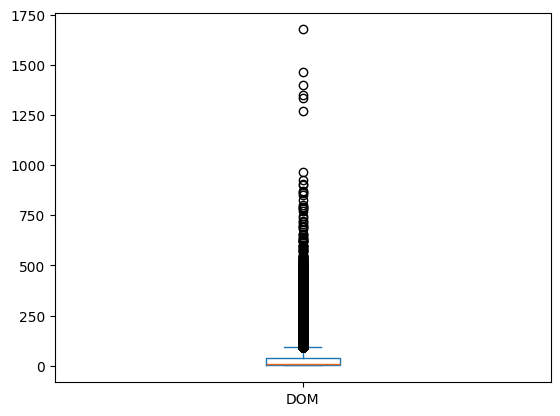

In [5]:
df.DOM.plot(kind = 'box')

<Axes: >

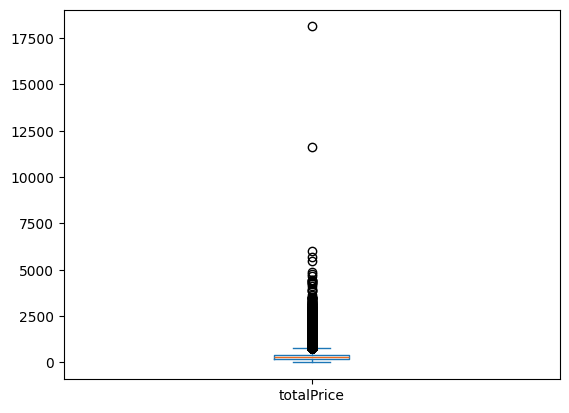

In [6]:
df.totalPrice.plot(kind = 'box')

In [7]:
def preprocess(data):
    df = data.copy()
    df = df.drop(["Cid", "id", "url", 'Unnamed: 0'], axis=1)

    df['DOM'] = df['DOM'].fillna(df['DOM'].dropna().mode())

    df = df.dropna(subset=['elevator', 'subway'])

    df["elevator"] = df["elevator"].map({1: "has elevator",
                                         0:"no elevator"})

    df["subway"] = df["subway"].map({1: "has subway",
                                     0:"no subway"})

    df["buildingStructure"] = df["buildingStructure"].map({ 1: "unknown",
                                                            2: "mixed",
                                                            3: "brick and wood",
                                                            4:"concrete",
                                                            5:"steel",
                                                            6:"steel-concrete composite"})

    df["renovationCondition"] = df["renovationCondition"].map({ 1: "other",
                                                                2: "rough",
                                                                3: "Simplicity",
                                                                4:"hardcover"})
    
    df = df[df.constructionTime != '未知']
    df.constructionTime = df.constructionTime.astype(int)

    df['floor'] = df['floor'].str.split(" ", n = 1, expand = True)[1]
    df.floor = df.floor.astype(int)

    Q1 = df.totalPrice.quantile(0.25)
    Q3 = df.totalPrice.quantile(0.75)
    IQR = Q3 - Q1
    df = df.drop(df[(df.totalPrice.values < Q1-1.5*IQR) | (df.totalPrice.values > Q3+1.5*IQR)].index)
    

    return df

    

In [8]:
data = preprocess(df)

In [9]:
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    num_unique = data[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'tradeTime' has 2550 unique categories.
'livingRoom' has 10 unique categories.
'drawingRoom' has 6 unique categories.
'bathRoom' has 8 unique categories.
'renovationCondition' has 4 unique categories.
'buildingStructure' has 6 unique categories.
'elevator' has 2 unique categories.
'subway' has 2 unique categories.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285040 entries, 0 to 318849
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  285040 non-null  float64
 1   Lat                  285040 non-null  float64
 2   tradeTime            285040 non-null  object 
 3   DOM                  141730 non-null  float64
 4   totalPrice           285040 non-null  float64
 5   square               285040 non-null  float64
 6   livingRoom           285040 non-null  object 
 7   drawingRoom          285040 non-null  object 
 8   kitchen              285040 non-null  int64  
 9   bathRoom             285040 non-null  object 
 10  floor                285040 non-null  int64  
 11  constructionTime     285040 non-null  int64  
 12  renovationCondition  285040 non-null  object 
 13  buildingStructure    285040 non-null  object 
 14  ladderRatio          285040 non-null  float64
 15  elevator             2

$$ distance = acos(sinφ_1*sinφ_2 + cosφ_1*cosφ_2 * cos(λ_2-λ_1)) * 6371.0088 $$
$$ φ: \text{latitude} $$ 
$$ λ: \text{longitude} $$ 

In [11]:
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

# Convert the latitude and longitude to radians
Lat = data['Lat'].apply(lambda x: radians(x))
Lng = data['Lng'].apply(lambda x: radians(x))

# Calculate the distance to the capital
x =  np.arccos(np.sin(Lat)*np.sin(capital_Lat) + np.cos(Lat)*np.cos(capital_Lat)*np.cos(capital_Lng-Lng))

# Convert the distance to kilometers
data['distanceToCapital'] = x*6371.0088

data.head()

Lng        Lat   tradeTime     DOM  totalPrice  square livingRoom  \
0  116.475489  40.019520  2016-08-09  1464.0       415.0  131.00          2   
1  116.453917  39.881534  2016-07-28   903.0       575.0  132.38          2   
3  116.438010  40.076114  2016-09-30   965.0       297.5  134.00          3   
4  116.428392  39.886229  2016-08-28   927.0       392.0   81.00          2   
5  116.466280  39.991363  2016-07-22   861.0       275.6   53.00          1   

  drawingRoom  kitchen bathRoom  floor  constructionTime renovationCondition  \
0           1        1        1     26              2005          Simplicity   
1           2        1        2     22              2004           hardcover   
3           1        1        1     21              2008               other   
4           1        1        1      6              1960               rough   
5           0        1        1      8              2005          Simplicity   

          buildingStructure  ladderRatio      elevator      subway  district  \
0  steel-concrete composite        0.217  has elevator  has subway         7   
1  steel-concrete composite        0.667  has elevator   no subway         7   
3  steel-concrete composite        0.273  has elevator   no subway         6   
4                     mixed        0.333   no elevator  has subway         1   
5  steel-concrete composite        0.333  has elevator   no subway         7   

   distanceToCapital  
0          14.074996  
1           4.701224  
3          19.293041  
4           2.683335  
5          10.914652

In [12]:
data['pricePerSquare'] = (data['totalPrice'] / data['square']) * 1000

data.head()

Lng        Lat   tradeTime     DOM  totalPrice  square livingRoom  \
0  116.475489  40.019520  2016-08-09  1464.0       415.0  131.00          2   
1  116.453917  39.881534  2016-07-28   903.0       575.0  132.38          2   
3  116.438010  40.076114  2016-09-30   965.0       297.5  134.00          3   
4  116.428392  39.886229  2016-08-28   927.0       392.0   81.00          2   
5  116.466280  39.991363  2016-07-22   861.0       275.6   53.00          1   

  drawingRoom  kitchen bathRoom  floor  constructionTime renovationCondition  \
0           1        1        1     26              2005          Simplicity   
1           2        1        2     22              2004           hardcover   
3           1        1        1     21              2008               other   
4           1        1        1      6              1960               rough   
5           0        1        1      8              2005          Simplicity   

          buildingStructure  ladderRatio      elevator      subway  district  \
0  steel-concrete composite        0.217  has elevator  has subway         7   
1  steel-concrete composite        0.667  has elevator   no subway         7   
3  steel-concrete composite        0.273  has elevator   no subway         6   
4                     mixed        0.333   no elevator  has subway         1   
5  steel-concrete composite        0.333  has elevator   no subway         7   

   distanceToCapital  pricePerSquare  
0          14.074996     3167.938931  
1           4.701224     4343.556428  
3          19.293041     2220.149254  
4           2.683335     4839.506173  
5          10.914652     5200.000000

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285040 entries, 0 to 318849
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  285040 non-null  float64
 1   Lat                  285040 non-null  float64
 2   tradeTime            285040 non-null  object 
 3   DOM                  141730 non-null  float64
 4   totalPrice           285040 non-null  float64
 5   square               285040 non-null  float64
 6   livingRoom           285040 non-null  object 
 7   drawingRoom          285040 non-null  object 
 8   kitchen              285040 non-null  int64  
 9   bathRoom             285040 non-null  object 
 10  floor                285040 non-null  int64  
 11  constructionTime     285040 non-null  int64  
 12  renovationCondition  285040 non-null  object 
 13  buildingStructure    285040 non-null  object 
 14  ladderRatio          285040 non-null  float64
 15  elevator             2

C:\Users\alireza\AppData\Local\Temp\ipykernel_8012\921086848.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax, bins = 20)


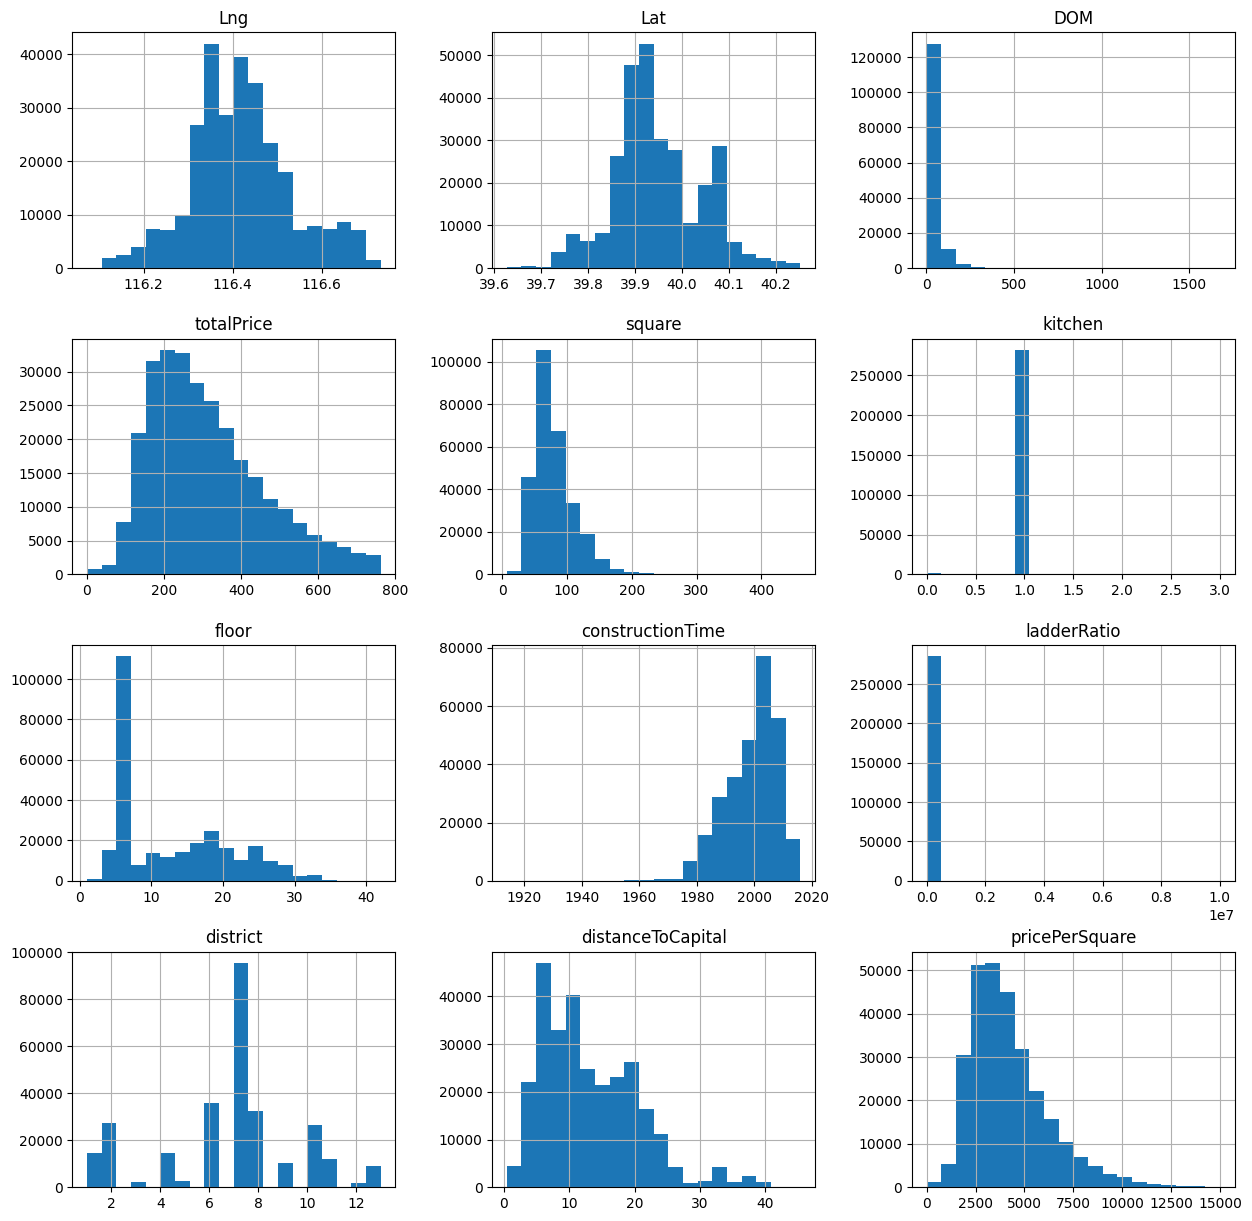

In [14]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
data.hist(ax = ax, bins = 20)
plt.show()

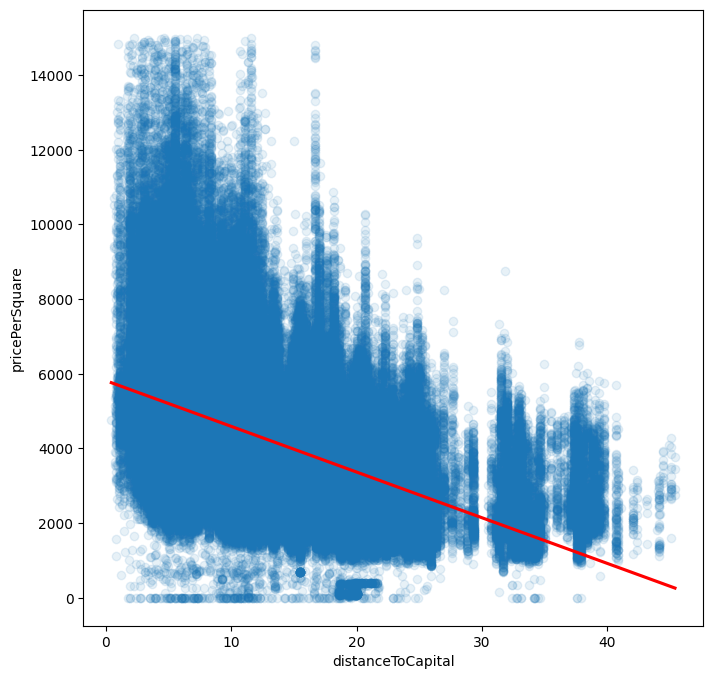

In [15]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = data, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

Text(0.5, 0, 'pricePerSquare')

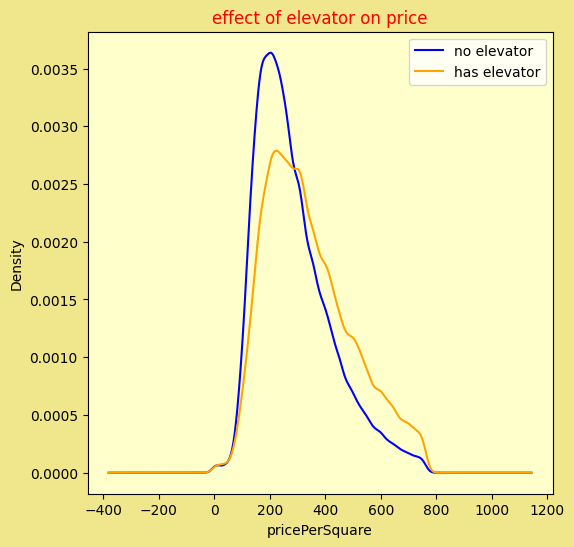

In [ ]:
fig, ax = plt.subplots(1,figsize=(6,6))

data[data.elevator == 'no elevator']['totalPrice'].plot(kind='kde',ax=ax,label='no elevator',color='blue')
data[data.elevator == 'has elevator']['totalPrice'].plot(kind='kde',ax=ax,label='has elevator',color='orange')
ax.legend()

ax.set_title('effect of elevator on price',color='red')
ax.set_facecolor('#ffffcc')
fig.set_facecolor('khaki')

ax.set_xlabel('totalPrice')

Text(0.5, 0, 'pricePerSquare')

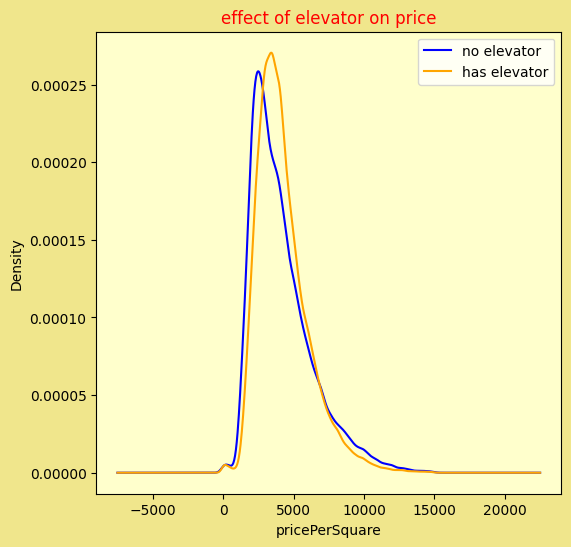

In [17]:

fig, ax = plt.subplots(1,figsize=(6,6))

data[data.elevator == 'no elevator']['pricePerSquare'].plot(kind='kde',ax=ax,label='no elevator',color='blue')
data[data.elevator == 'has elevator']['pricePerSquare'].plot(kind='kde',ax=ax,label='has elevator',color='orange')
ax.legend()

ax.set_title('effect of elevator on price',color='red')
ax.set_facecolor('#ffffcc')
fig.set_facecolor('khaki')

ax.set_xlabel('pricePerSquare')

Text(0.5, 1.0, 'scatter plot')

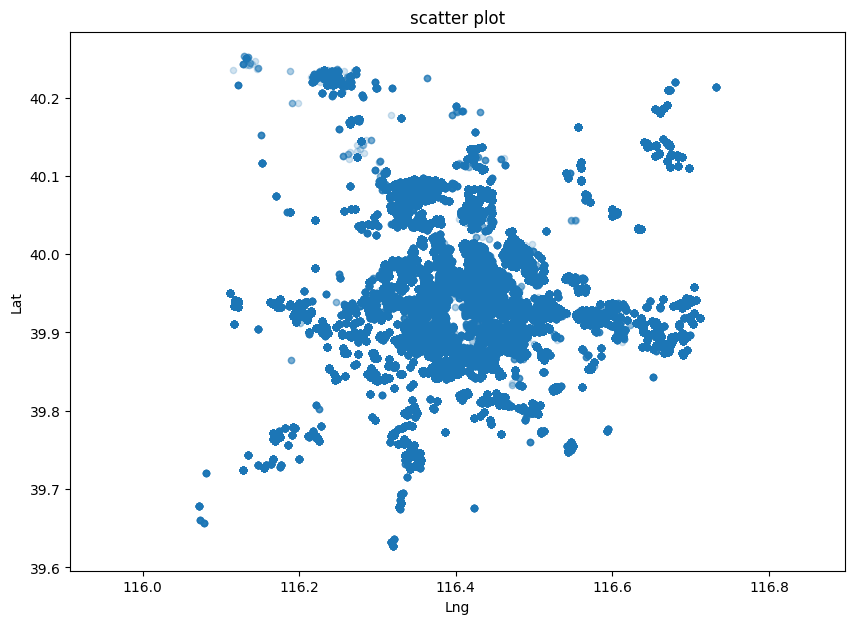

In [18]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(10,7)

data.plot(x='Lng', y='Lat', ax=ax1, kind='scatter', alpha=0.2)
ax1.axis('equal')
ax1.set_title('scatter plot')

(np.float64(116.03952079999998),
 np.float64(116.7653712),
 np.float64(39.5957436),
 np.float64(40.2840444))

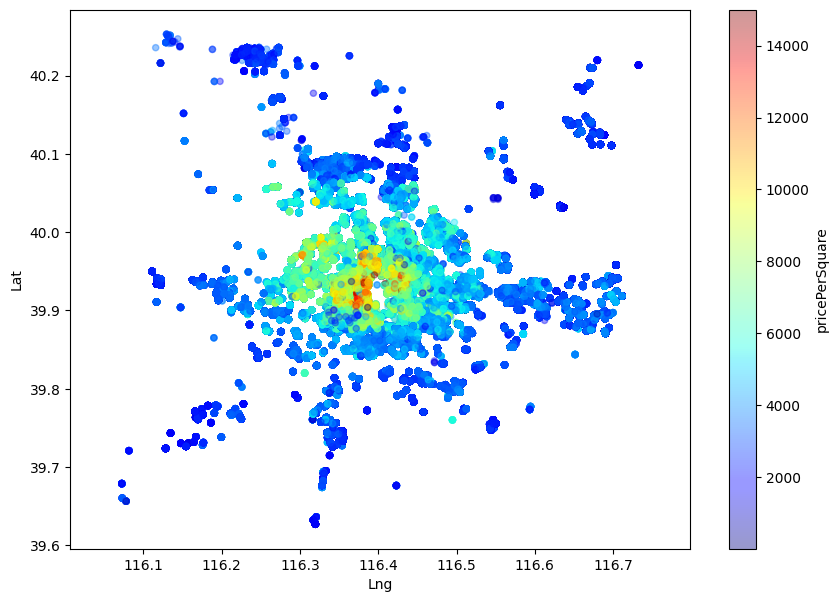

In [19]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(10,7)

data.plot(x='Lng', y='Lat', ax=ax2, kind='scatter', alpha=0.4,
                    c='pricePerSquare', cmap=plt.get_cmap("jet"), colorbar=True)

ax2.axis('equal')

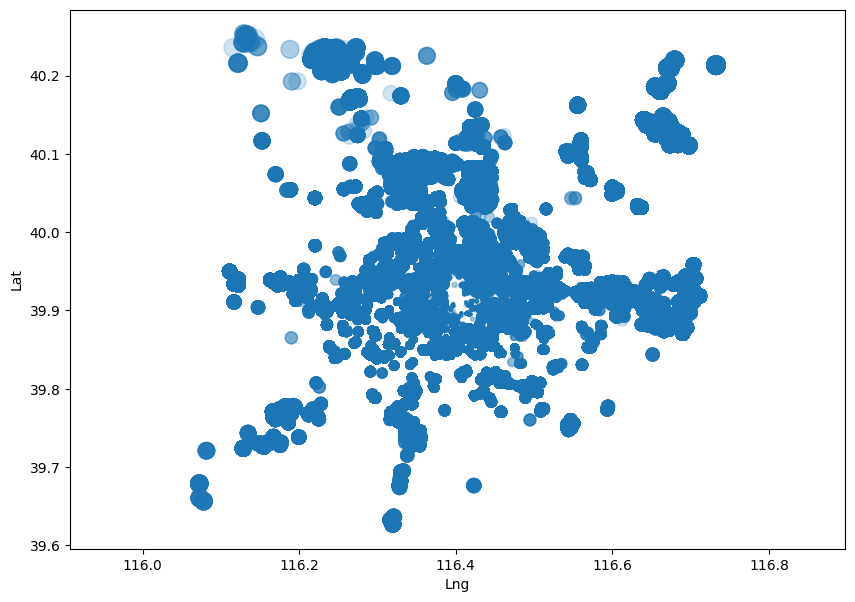

In [20]:
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(10,7)

data.plot(x = 'Lng' , y ='Lat' ,ax = ax3, kind = 'scatter', alpha = 0.2,\
    s = data['distanceToCapital'] * 4)

ax3.axis('equal');

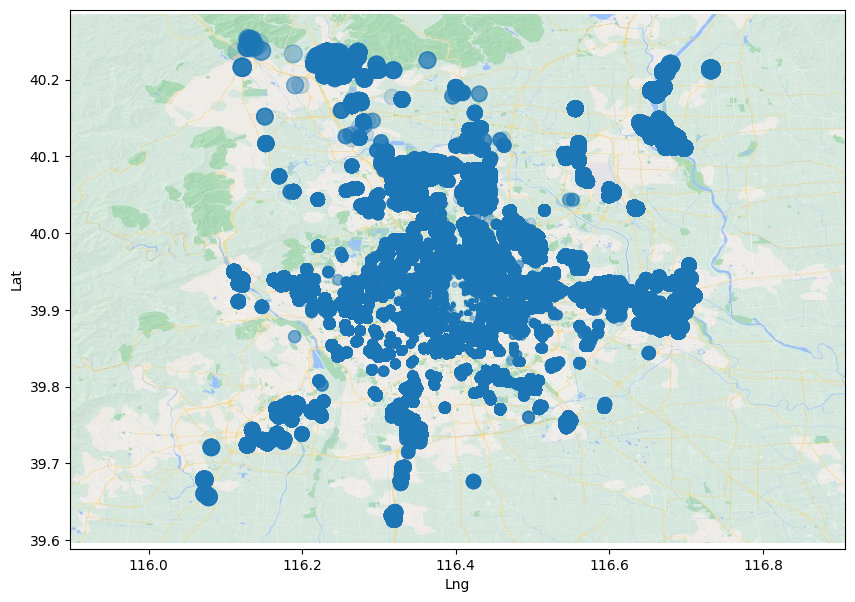

In [21]:
beijing_img = mpimg.imread('map1.jpg')
ax3.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])
fig3

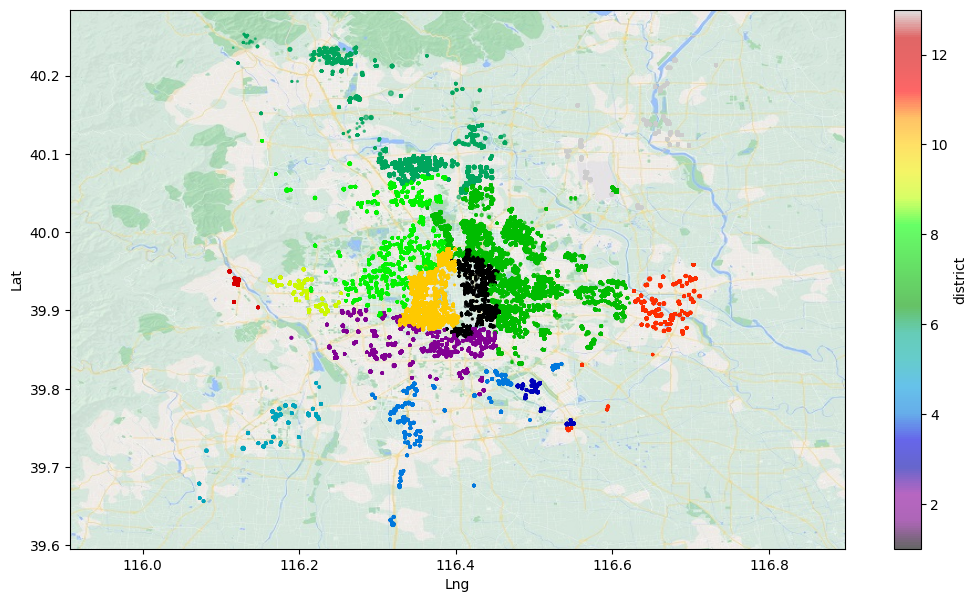

In [22]:
fig4, ax4 = plt.subplots(figsize = (12.5, 7))

ax4.axis("equal")

data.plot(x = "Lng", y = "Lat", c = "district", kind = "scatter",
                    s = (data["square"] / 40) , cmap = plt.get_cmap('nipy_spectral'), ax = ax4, alpha = 0.6)

ax4.imshow(beijing_img , extent = [ax4.get_xlim()[0], ax4.get_xlim()[1], ax4.get_ylim()[0], ax4.get_ylim()[1]]);

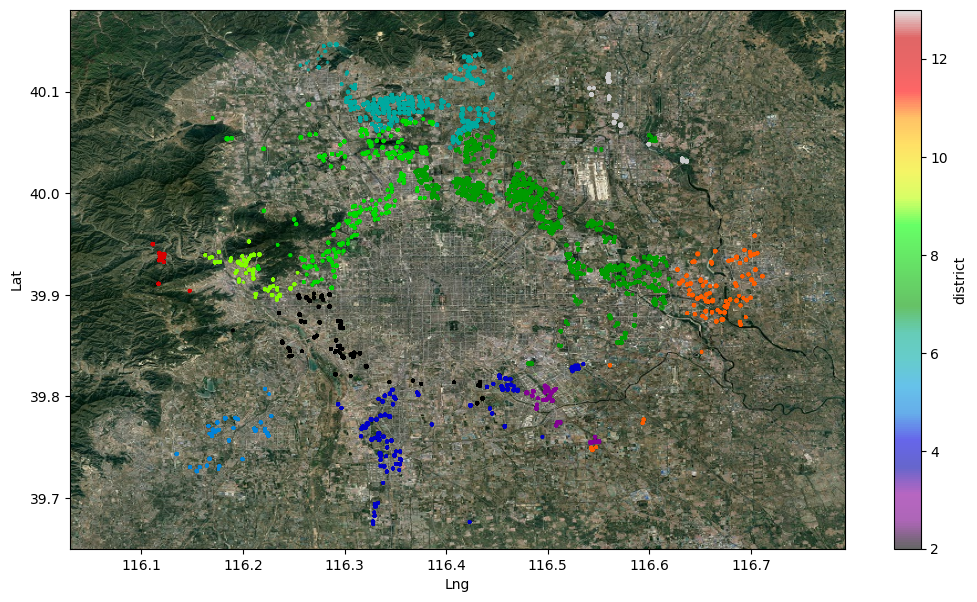

In [23]:
fig5, ax5 = plt.subplots(figsize = (12.5, 7))
ax5.axis("equal") 

housing_sample = data[(data["distanceToCapital"] > 10) & (data["distanceToCapital"] < 30)]

beijing_img2 = mpimg.imread("map2.jpg") 

housing_sample.plot(x = "Lng", y = "Lat", c = "district", kind = "scatter", ax = ax5,
                    s = (housing_sample["square"] / 40), cmap = plt.get_cmap('nipy_spectral'), alpha = 0.6)

ax5.imshow(beijing_img2, extent = [ax5.get_xlim()[0], ax5.get_xlim()[1], ax5.get_ylim()[0], ax5.get_ylim()[1]]);

In [24]:
districts = data.district.unique()
districts_df = pd.DataFrame(data=np.sort(districts), columns=['district'])
districts_df

district
0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13

In [25]:
districts_df['pricePerSquare mean'] = data.groupby(by='district',)['pricePerSquare'].mean().values
districts_df['% houses with elevator'] = data.groupby(by='district',)['elevator'].apply(lambda x: (x[x == 'has elevator'].count()/x.count()) * 100).values
districts_df['% houses with subway'] = data.groupby(by='district',)['subway'].apply(lambda x: (x[x == 'has subway'].count()/x.count()) * 100).values
districts_df['square mean'] = data.groupby(by='district',)['square'].mean().values
districts_df['buildeng age mean'] = 2021 - data.groupby(by='district',)['constructionTime'].mean().values
districts_df['frequent buildingStructure'] = data.groupby(by='district',)['buildingStructure'].agg(lambda x : x.value_counts().idxmax()).values
districts_df

district  pricePerSquare mean  % houses with elevator  \
0          1          5981.774965               56.216550   
1          2          3805.924811               68.647623   
2          3          3130.333142               66.636691   
3          4          2999.928821               39.983398   
4          5          2841.761483               80.077031   
5          6          2952.222451               37.892663   
6          7          4225.965657               66.746216   
7          8          5312.914827               51.883462   
8          9          3491.126972               46.534461   
9         10          6464.899480               48.030692   
10        11          2782.509680               51.762953   
11        12          2615.607527               39.641311   
12        13          2412.935147               33.773796   

    % houses with subway  square mean  buildeng age mean  \
0              93.488404    67.047856          25.151709   
1              61.825544    76.951352          20.639123   
2              47.032374    92.071484          15.494604   
3              43.027117    86.322272          18.324364   
4              39.005602    89.297990          11.271359   
5              43.553669   100.121614          17.536464   
6              68.307898    78.845544          22.553717   
7              61.087404    73.615248          24.191570   
8              27.636823    73.047513          25.653835   
9              76.322951    62.386157          28.349599   
10             34.125145    86.153699          16.959361   
11              0.123686    85.082703          18.532468   
12             29.764838    92.813069          19.864502   

   frequent buildingStructure  
0    steel-concrete composite  
1    steel-concrete composite  
2    steel-concrete composite  
3                       mixed  
4    steel-concrete composite  
5                       mixed  
6    steel-concrete composite  
7    steel-concrete composite  
8    steel-concrete composite  
9                       mixed  
10   steel-concrete composite  
11                      mixed  
12                      mixed

In [26]:
districts_df = districts_df.set_index('district')
districts_df

pricePerSquare mean  % houses with elevator  % houses with subway  \
district                                                                      
1                 5981.774965               56.216550             93.488404   
2                 3805.924811               68.647623             61.825544   
3                 3130.333142               66.636691             47.032374   
4                 2999.928821               39.983398             43.027117   
5                 2841.761483               80.077031             39.005602   
6                 2952.222451               37.892663             43.553669   
7                 4225.965657               66.746216             68.307898   
8                 5312.914827               51.883462             61.087404   
9                 3491.126972               46.534461             27.636823   
10                6464.899480               48.030692             76.322951   
11                2782.509680               51.762953             34.125145   
12                2615.607527               39.641311              0.123686   
13                2412.935147               33.773796             29.764838   

          square mean  buildeng age mean frequent buildingStructure  
district                                                             
1           67.047856          25.151709   steel-concrete composite  
2           76.951352          20.639123   steel-concrete composite  
3           92.071484          15.494604   steel-concrete composite  
4           86.322272          18.324364                      mixed  
5           89.297990          11.271359   steel-concrete composite  
6          100.121614          17.536464                      mixed  
7           78.845544          22.553717   steel-concrete composite  
8           73.615248          24.191570   steel-concrete composite  
9           73.047513          25.653835   steel-concrete composite  
10          62.386157          28.349599                      mixed  
11          86.153699          16.959361   steel-concrete composite  
12          85.082703          18.532468                      mixed  
13          92.813069          19.864502                      mixed

In [27]:
data['tradeTime'] = pd.to_datetime(data['tradeTime'])
data.head()

Lng        Lat  tradeTime     DOM  totalPrice  square livingRoom  \
0  116.475489  40.019520 2016-08-09  1464.0       415.0  131.00          2   
1  116.453917  39.881534 2016-07-28   903.0       575.0  132.38          2   
3  116.438010  40.076114 2016-09-30   965.0       297.5  134.00          3   
4  116.428392  39.886229 2016-08-28   927.0       392.0   81.00          2   
5  116.466280  39.991363 2016-07-22   861.0       275.6   53.00          1   

  drawingRoom  kitchen bathRoom  floor  constructionTime renovationCondition  \
0           1        1        1     26              2005          Simplicity   
1           2        1        2     22              2004           hardcover   
3           1        1        1     21              2008               other   
4           1        1        1      6              1960               rough   
5           0        1        1      8              2005          Simplicity   

          buildingStructure  ladderRatio      elevator      subway  district  \
0  steel-concrete composite        0.217  has elevator  has subway         7   
1  steel-concrete composite        0.667  has elevator   no subway         7   
3  steel-concrete composite        0.273  has elevator   no subway         6   
4                     mixed        0.333   no elevator  has subway         1   
5  steel-concrete composite        0.333  has elevator   no subway         7   

   distanceToCapital  pricePerSquare  
0          14.074996     3167.938931  
1           4.701224     4343.556428  
3          19.293041     2220.149254  
4           2.683335     4839.506173  
5          10.914652     5200.000000

C:\Users\alireza\AppData\Local\Temp\ipykernel_8012\916920600.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[data.tradeTime >= '2010'].resample(rule='M', on='tradeTime')['pricePerSquare'].mean().plot(ax=ax1, color = 'crimson')


Text(0, 0.5, 'pricePerSquare')

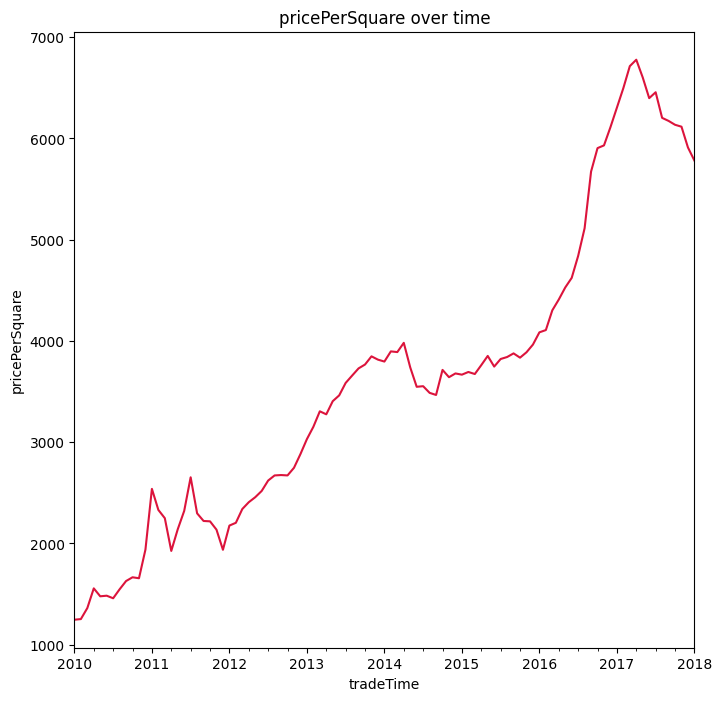

In [28]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(8,8)

data.loc[data.tradeTime >= '2010'].resample(rule='M', on='tradeTime')['pricePerSquare'].mean().plot(ax=ax1, color = 'crimson')
ax1.set_title('pricePerSquare over time')
ax1.set_ylabel('pricePerSquare')

C:\Users\alireza\AppData\Local\Temp\ipykernel_8012\631879327.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[data.tradeTime >= '2010'].resample(rule='3M', on='tradeTime').distanceToCapital.apply(lambda x: x[x < 15].count()).plot(ax=ax2, color='orange')


Text(0, 0.5, 'frequency')

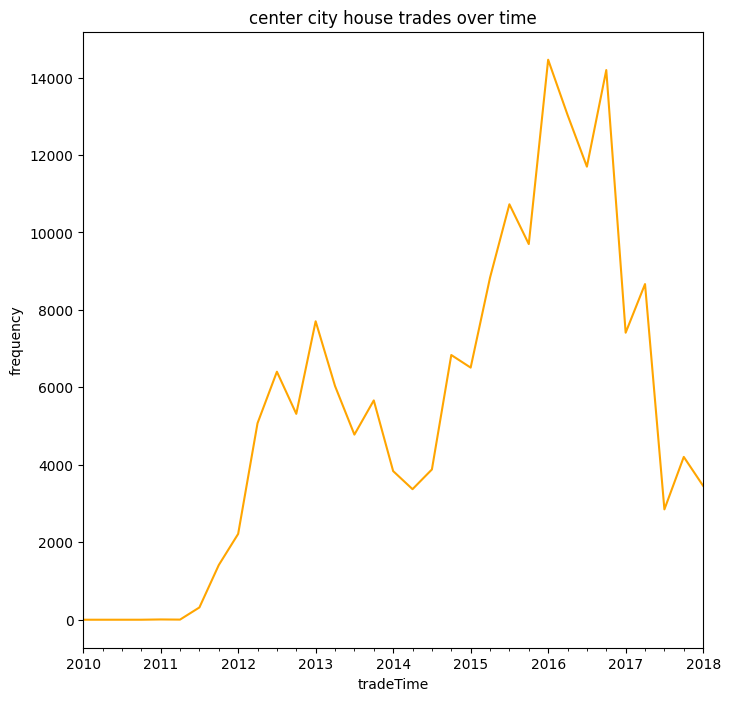

In [29]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(8,8)

data.loc[data.tradeTime >= '2010'].resample(rule='3M', on='tradeTime').distanceToCapital.apply(lambda x: x[x < 15].count()).plot(ax=ax2, color='orange')
ax2.set_title('center city house trades over time')
ax2.set_ylabel('frequency')

In [38]:
data['livingRoom'] = data['livingRoom'].astype('int64')

C:\Users\alireza\AppData\Local\Temp\ipykernel_8012\1618066020.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.loc[data.tradeTime >= '2010'].resample(rule='12M', on='tradeTime')['district'].mean().plot(ax=ax1, color = 'crimson')


<Axes: xlabel='tradeTime'>

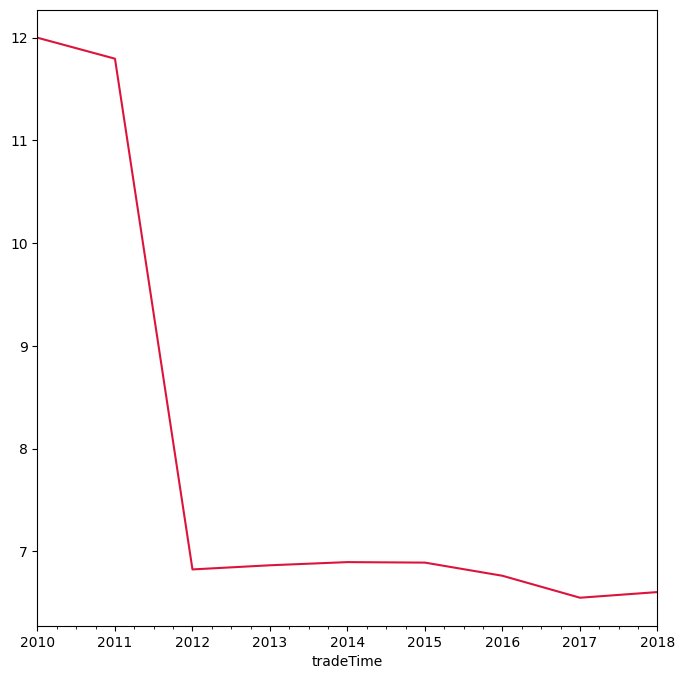

In [49]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(8,8)

data.loc[data.tradeTime >= '2010'].resample(rule='12M', on='tradeTime')['district'].mean().plot(ax=ax1, color = 'crimson')